## Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## View and Clean Data

In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.drop("Cabin", axis=1, inplace=True)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/2379305633.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/2379305633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Create Lable and One-Hot Encoders 

In [8]:
le = LabelEncoder()

train_df["Sex"] = le.fit_transform(train_df["Sex"])

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [10]:
ohe = OneHotEncoder(drop="first", sparse_output=False)

embarked_encoded_train = ohe.fit_transform(train_df[["Embarked"]])

embarked_train_df = pd.DataFrame(embarked_encoded_train, columns=ohe.get_feature_names_out(["Embarked"]))

embarked_train_df.index = train_df.index

train_df = pd.concat([train_df.drop("Embarked", axis=1), embarked_train_df], axis=1)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,1.0


## Use Train Test Split for Logical Regression Model

In [12]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"]

X_train = train_df[features]

y_train = train_df["Survived"]

In [13]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(max_iter=1000)

model.fit(X=X_train_split, y=y_train_split)

LogisticRegression(max_iter=1000)

In [15]:
y_train_pred = model.predict(X_val)

y_train_prob = model.predict(X_val)

In [16]:
train_accuracy = accuracy_score(y_val, y_train_pred)
print(f"Validation Score is : {train_accuracy:.4f}")

Validation Score is : 0.8101


In [17]:
train_survived = train_df[train_df["Survived"] == 1]
train_died =  train_df[train_df["Survived"] == 0]

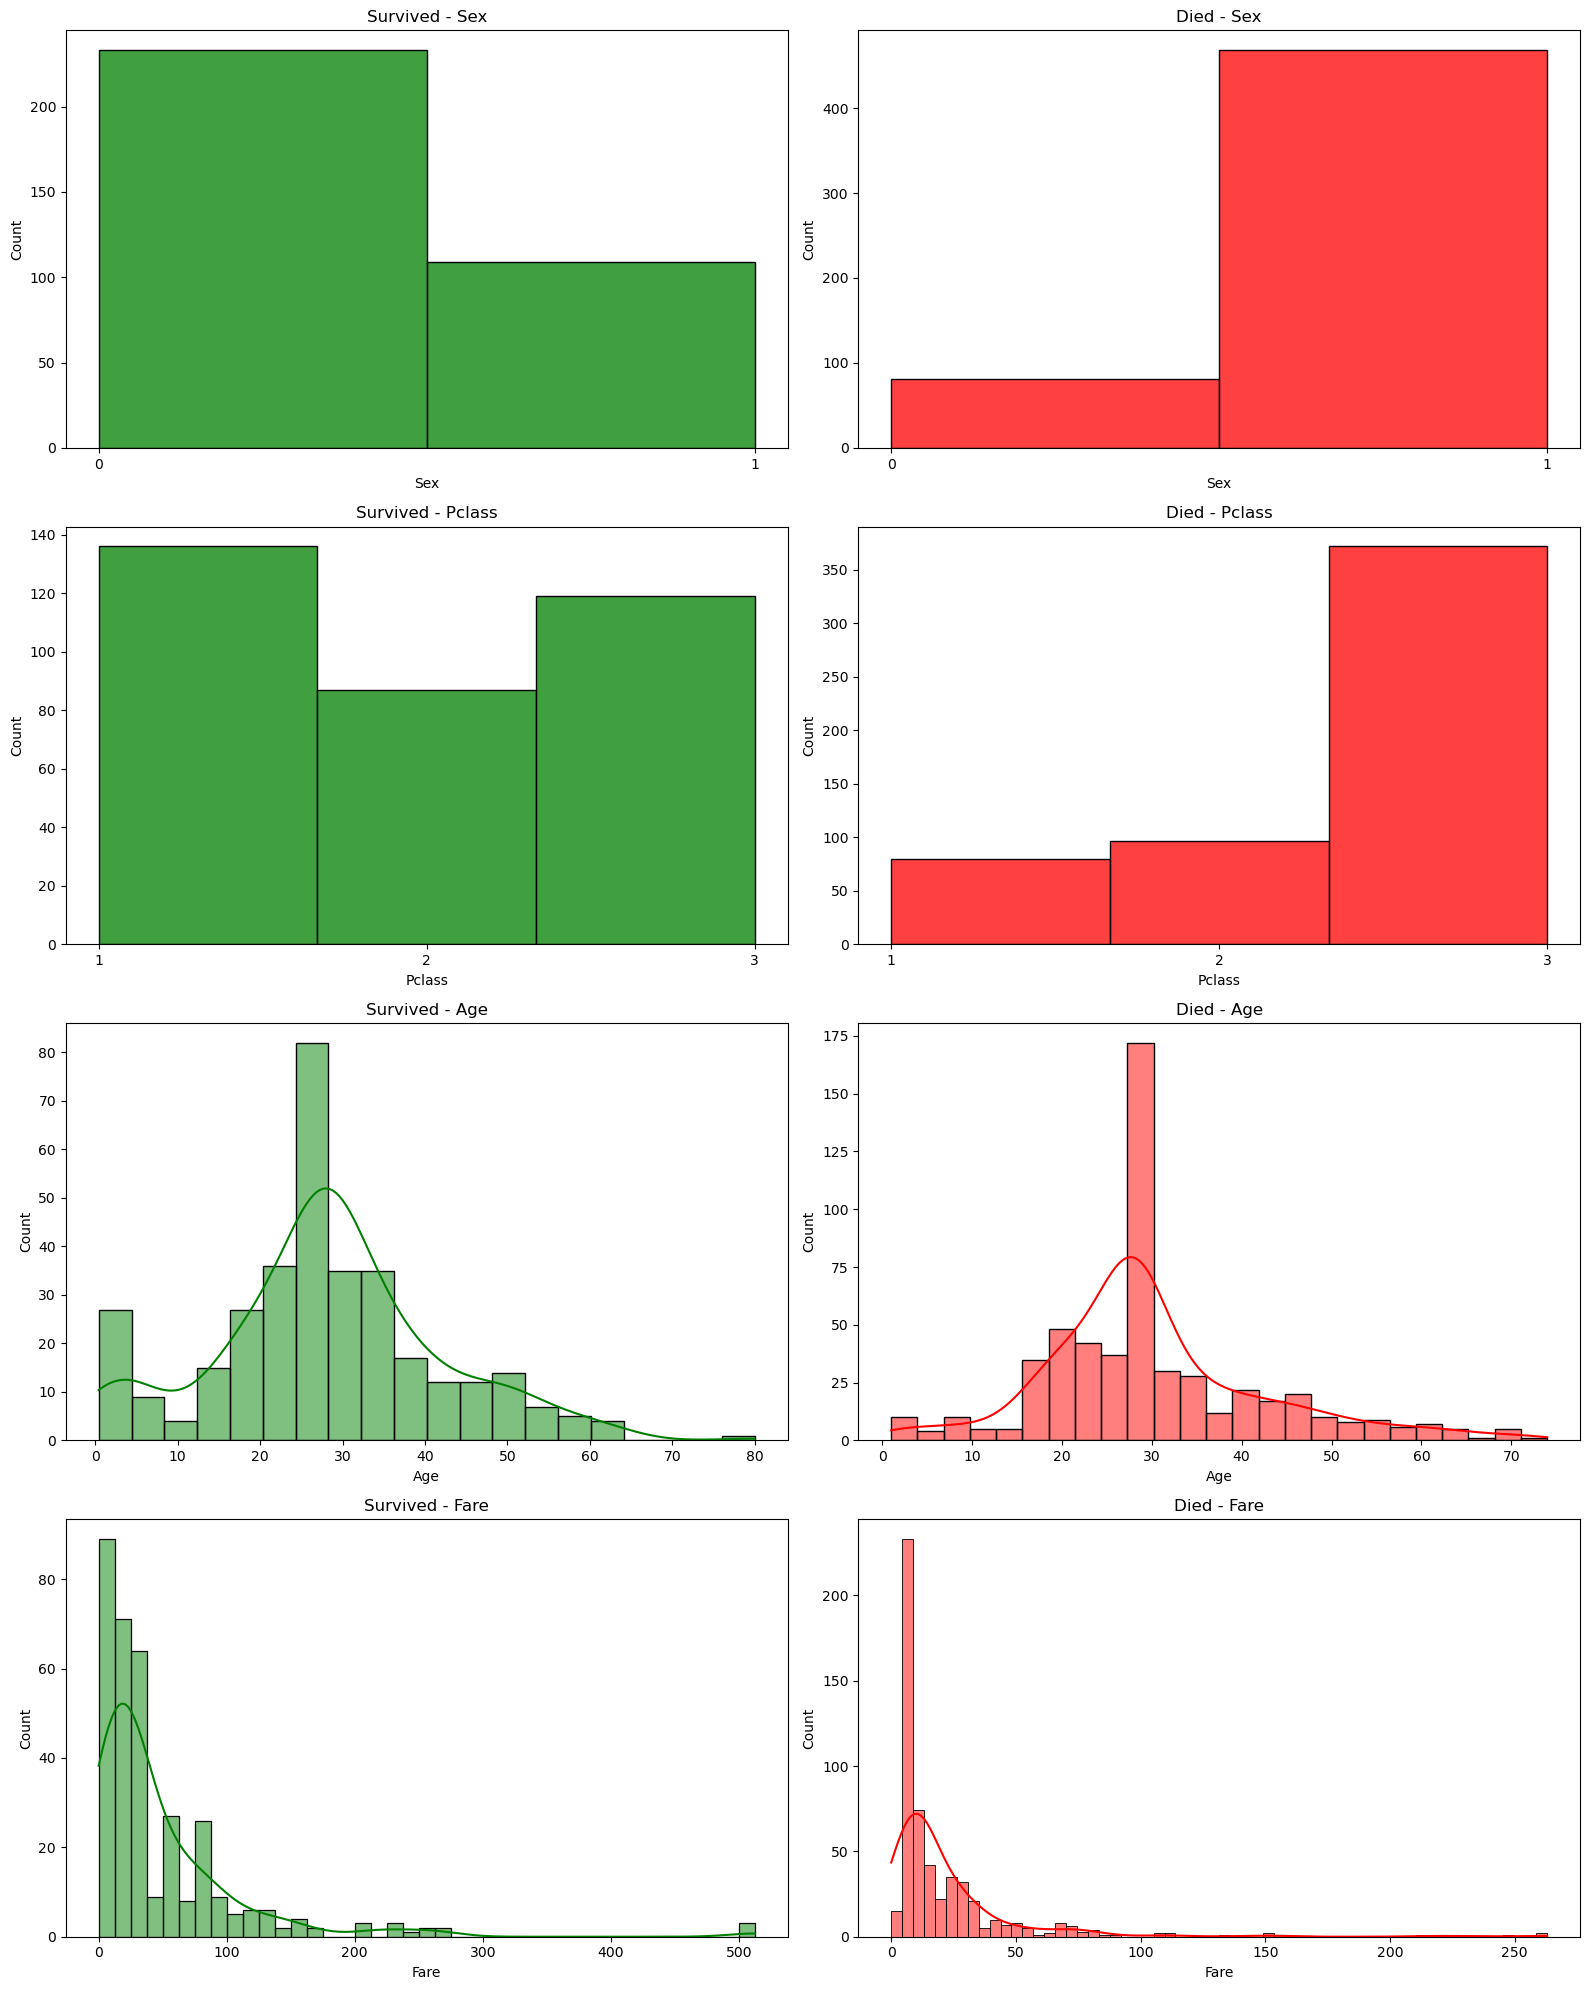

In [56]:

features_to_plot = ["Sex", "Pclass", "Age", "Fare"]


fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.reshape(4, 2)

for i, feature in enumerate(features_to_plot):
    
    if feature == "Sex":
        sns.histplot(data=train_survived, x=feature, ax=axes[i][0], stat="count", color="green", bins=2)
        axes[i][0].set_xticks([0, 1])
    elif feature == "Pclass":
        sns.histplot(data=train_survived, x=feature, ax=axes[i][0], stat="count", color="green", bins=3)
        axes[i][0].set_xticks([1, 2, 3])
    else:
        sns.histplot(data=train_survived, x=feature, ax=axes[i][0], kde=True, stat="count", color="green")

    axes[i][0].set_title(f"Survived - {feature}")


    
    if feature == "Sex":
        sns.histplot(data=train_died, x=feature, ax=axes[i][1], stat="count", color="red", bins=2)
        axes[i][1].set_xticks([0, 1])
    elif feature == "Pclass":
        sns.histplot(data=train_died, x=feature, ax=axes[i][1], stat="count", color="red", bins=3)
        axes[i][1].set_xticks([1, 2, 3])
    else:
        sns.histplot(data=train_died, x=feature, ax=axes[i][1], kde=True, stat="count", color="red")

    axes[i][1].set_title(f"Died - {feature}")


plt.tight_layout()
plt.show()

## Testing Data

In [19]:
test_df = pd.read_csv("./data/test.csv")

In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test_df.drop("Cabin", axis=1, inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mode()[0], inplace=True)

/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/1562371905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/1562371905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [24]:
test_df["Sex"] = le.transform(test_df["Sex"])

In [25]:
embarked_encoded_test = ohe.transform(test_df[["Embarked"]])

In [26]:
embarked_test_df = pd.DataFrame(embarked_encoded_test, columns=ohe.get_feature_names_out(["Embarked"]))

embarked_test_df.index = test_df.index

test_df = pd.concat([test_df.drop("Embarked", axis=1), embarked_test_df], axis=1)

In [27]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0.0,1.0


In [30]:
X_test = test_df[features]

y_test_pred = model.predict(X_test)

y_test_prob = model.predict(X_test)

In [33]:
test_df["Survived_Prediction"] = y_test_pred

In [34]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Survived_Prediction
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1.0,0.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0.0,1.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1.0,0.0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0.0,1.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0.0,1.0,1


In [31]:
submission = pd.DataFrame({
    "PassangerID": test_df["PassengerId"],
    "Survived": y_test_pred
})

submission.to_csv("submission.csv", index=False)

## Plot

In [36]:
test_survived = test_df[test_df["Survived_Prediction"] == 1]
test_died =  test_df[test_df["Survived_Prediction"] == 0]

/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/1927982188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_survived["Fare_Scaled"] = test_survived["Fare"] / 100
/var/folders/ph/ky003tcd261fjfnnlk8hk7tr0000gn/T/ipykernel_83563/1927982188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_died["Fare_Scaled"] = test_died["Fare"] / 100


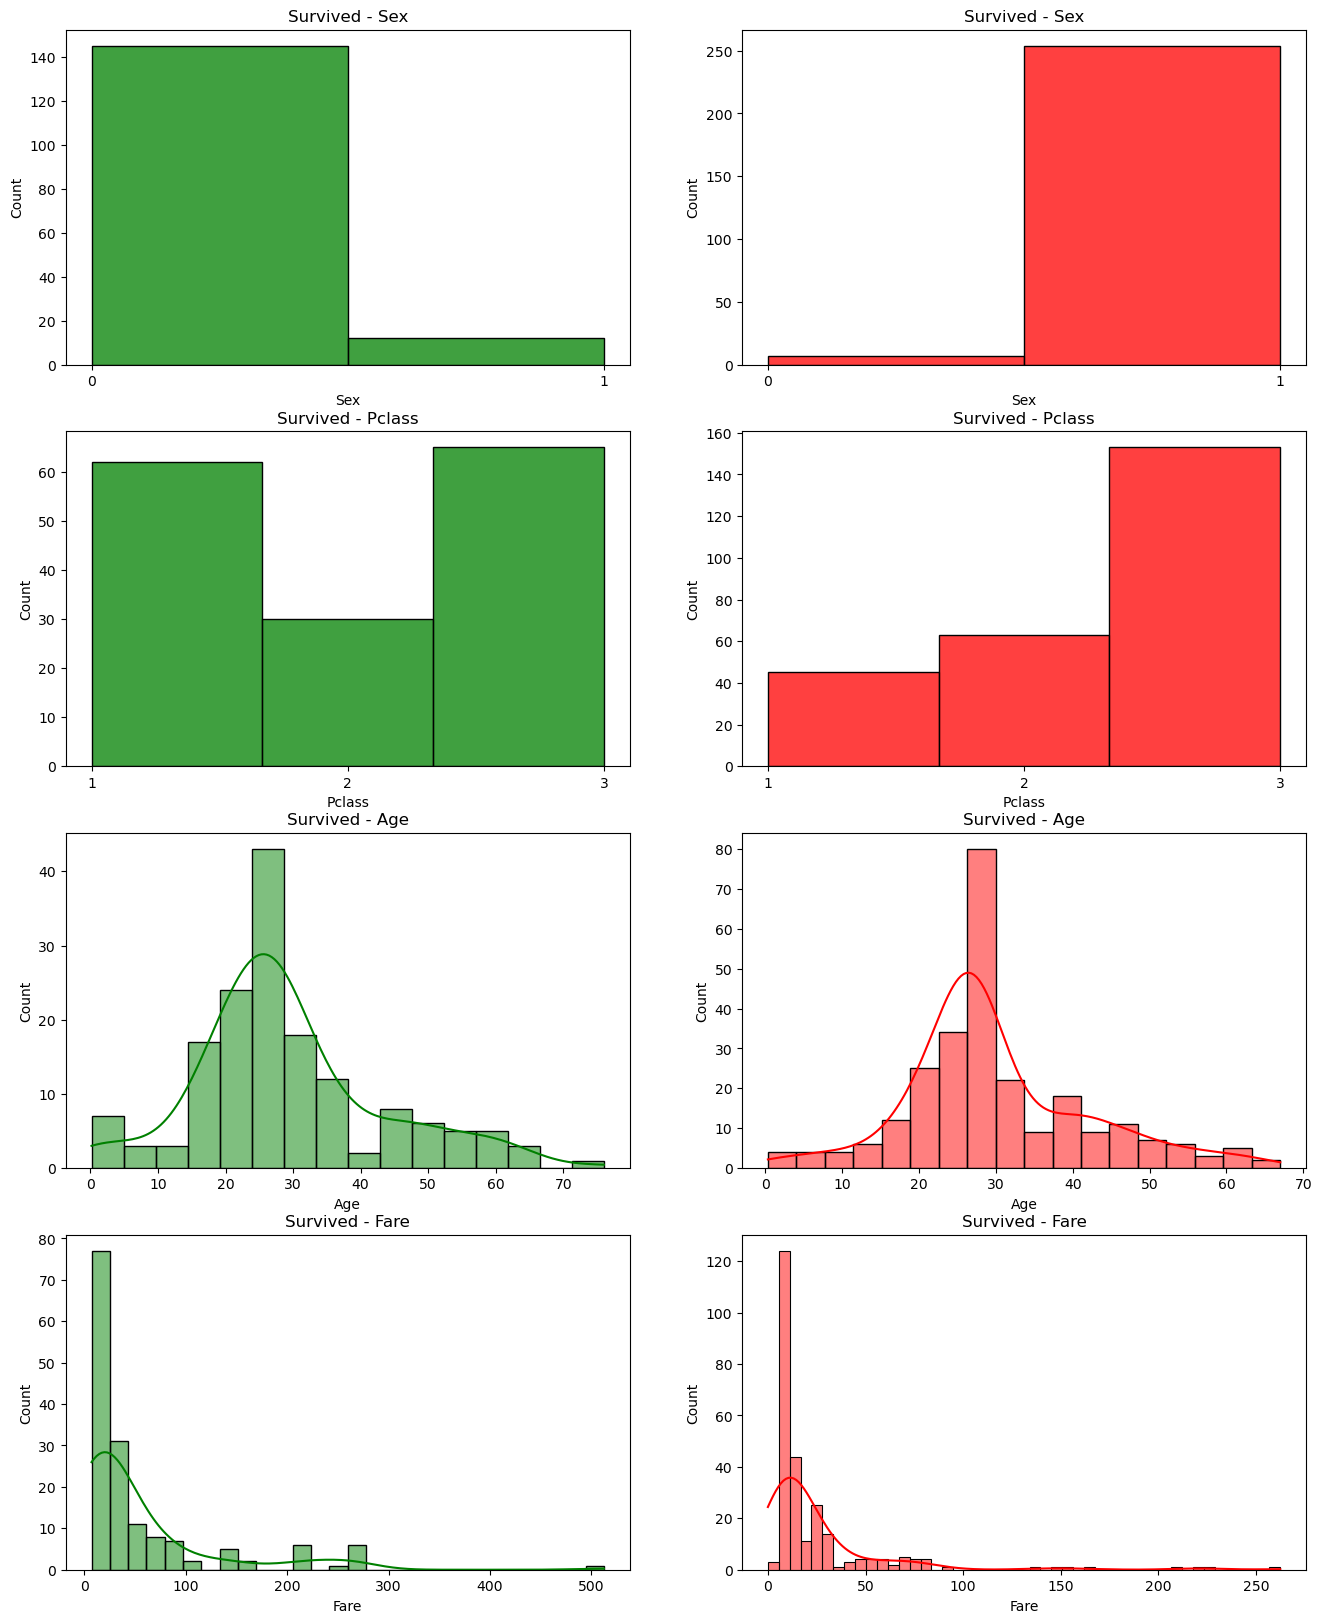

In [58]:
test_survived["Fare_Scaled"] = test_survived["Fare"] / 100
test_died["Fare_Scaled"] = test_died["Fare"] / 100

features_to_plot = ["Sex", "Pclass", "Age", "Fare"]

fig, axes = plt.subplots(4, 2, figsize=(16,20))
axes = axes.reshape(4,2)

for i, feature in enumerate(features_to_plot):
    if feature == "Sex":
        sns.histplot(data=test_survived, x=feature, ax=axes[i][0], stat="count", color="green", bins=2)
        axes[i][0].set_xticks([0,1])
    elif feature == "Pclass":
        sns.histplot(data=test_survived, x=feature, ax=axes[i][0], stat="count", color="green", bins=3)
        axes[i][0].set_xticks([1,2,3])
    else:
        sns.histplot(data=test_survived, x=feature, ax=axes[i][0], kde=True, stat="count", color="green")

    axes[i][0].set_title(f"Survived - {feature}")
    if feature == "Sex":
        sns.histplot(data=test_died, x=feature, ax=axes[i][1], stat="count", color="red", bins=2)
        axes[i][1].set_xticks([0,1])
    elif feature == "Pclass":
        sns.histplot(data=test_died, x=feature, ax=axes[i][1], stat="count", color="red", bins=3)
        axes[i][1].set_xticks([1,2,3])
    else:
        sns.histplot(data=test_died, x=feature, ax=axes[i][1], kde=True, stat="count", color="red")
    axes[i][1].set_title(f"Survived - {feature}")